In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import OpenWeather_API_KEY
import time
from datetime import datetime

In [2]:
pwd

'/Users/hankaizhu/Repos/World_Weather_Analysis'

In [3]:
lats=np.random.uniform(-90, 90, size=1500)
lngs=np.random.uniform(-180,180,size=1500)
lat_lng=zip(lats,lngs)
lat_lng

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lng)
coordinates

[(-21.715865228019524, -158.40815279479432),
 (89.23333364304793, 159.51672897526635),
 (-57.530929466113804, 2.2766433444634515),
 (33.235128246439714, -48.62386365674743),
 (-20.9162100221549, -31.741260064608156),
 (-65.4003645979198, -130.01195305701617),
 (-73.79438289713764, 78.1449770586263),
 (-72.92887969752775, -172.0388955095278),
 (56.30752772287531, -171.45049497048728),
 (-20.081684144377306, 13.329602183958286),
 (26.357893061811836, 51.66692873595244),
 (51.370266157700854, -155.80739353435385),
 (39.476857342387234, 67.35147621807448),
 (7.30880007172189, 70.99373739110877),
 (-40.66036583414784, 57.060524615278695),
 (-36.44983765635032, -94.43108426504136),
 (22.26120556439136, -87.7884239962223),
 (47.51071658957173, 83.0481276089319),
 (22.38265738854888, 156.5713717781676),
 (-1.3151316559261232, 103.76061889256084),
 (-16.24918826782583, 18.90908137584225),
 (20.726000546863204, 47.46927157454948),
 (47.91467630672764, -55.802235313708934),
 (31.51392375702457, 1

In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(len(cities))
print(cities[0])

630
avarua


In [7]:
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OpenWeather_API_KEY
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=910799ed5338378d0da7cc7a5308ebb1


In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "santa+cruz"
units = "metric"

query_url = f"{url}appid={OpenWeather_API_KEY}&q={city}&units={units}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=910799ed5338378d0da7cc7a5308ebb1&q=santa+cruz&units=metric


In [25]:
request_data = requests.get(query_url)
print(request_data.json())

{'coord': {'lon': -63.1667, 'lat': -17.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.7, 'feels_like': 22.38, 'temp_min': 21.7, 'temp_max': 21.7, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1646804152, 'sys': {'type': 1, 'id': 8661, 'country': 'BO', 'sunrise': 1646820846, 'sunset': 1646865153}, 'timezone': -14400, 'id': 3904906, 'name': 'Santa Cruz de la Sierra', 'cod': 200}


### Why? Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url.


In [33]:
# Create an empty list to hold the weather data.
url2 = f"{url}appid={OpenWeather_API_KEY}&units={units}&q="
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count=1
        
    #print(city.replace(" ", "+"))
    
    city_url = url2 + city.replace(" ", "+")   
    # print(city_url)
    #"Boston"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
        
    # Run an API request for each of the cities.
    try:
        city_weather= requests.get(city_url).json()

        city_lat= city_weather['coord']['lat']
        city_lng= city_weather['coord']['lon']
        city_max_temp= city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city.
    except Exception as e:
        print("City not found. Skipping...")
        pass
        
    #except Exception as e:     
        #print(e)
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | khorixas
Processing Record 11 of Set 1 | khor
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | urgut
Processing Record 14 of Set 1 | dhidhdhoo
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | panaba
Processing Record 18 of Set 1 | kurchum
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | jambi
Processing Record 21 of Set 1 | rundu
Processing Record 22 of Set 1 | riyadh
Processing Record 23 of Set 1 | harbour breto

Processing Record 37 of Set 4 | panguipulli
Processing Record 38 of Set 4 | parabel
Processing Record 39 of Set 4 | yinchuan
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | port barton
Processing Record 43 of Set 4 | jiangyou
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | mokhotlong
Processing Record 46 of Set 4 | teya
Processing Record 47 of Set 4 | ongandjera
Processing Record 48 of Set 4 | fairbanks
Processing Record 49 of Set 4 | shinjo
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | sabalgarh
Processing Record 4 of Set 5 | piranhas
Processing Record 5 of Set 5 | tuktoyaktuk
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | amberley
Processing Record 9 of Set 5 | clyde river
Processing Record 10 of Set 5 | sitka
Processing

Processing Record 29 of Set 8 | antofagasta
Processing Record 30 of Set 8 | tarko-sale
Processing Record 31 of Set 8 | luige
Processing Record 32 of Set 8 | qujing
Processing Record 33 of Set 8 | rutland
Processing Record 34 of Set 8 | beira
Processing Record 35 of Set 8 | ginir
Processing Record 36 of Set 8 | praia da vitoria
Processing Record 37 of Set 8 | lagoa
Processing Record 38 of Set 8 | comodoro rivadavia
Processing Record 39 of Set 8 | ballina
Processing Record 40 of Set 8 | akdepe
Processing Record 41 of Set 8 | senneterre
Processing Record 42 of Set 8 | dwarka
Processing Record 43 of Set 8 | todos santos
Processing Record 44 of Set 8 | saurimo
Processing Record 45 of Set 8 | trelew
Processing Record 46 of Set 8 | linchuan
City not found. Skipping...
Processing Record 47 of Set 8 | mount gambier
Processing Record 48 of Set 8 | gat
Processing Record 49 of Set 8 | oksfjord
Processing Record 50 of Set 8 | morrelganj
City not found. Skipping...
Processing Record 1 of Set 9 | chu

Processing Record 18 of Set 12 | bonthe
Processing Record 19 of Set 12 | champerico
Processing Record 20 of Set 12 | bac
Processing Record 21 of Set 12 | marawi
Processing Record 22 of Set 12 | abdanan
Processing Record 23 of Set 12 | faya
Processing Record 24 of Set 12 | petatlan
Processing Record 25 of Set 12 | bose
Processing Record 26 of Set 12 | hanstholm
Processing Record 27 of Set 12 | mayo
Processing Record 28 of Set 12 | chicama
Processing Record 29 of Set 12 | seinajoki
Processing Record 30 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 31 of Set 12 | hami
Processing Record 32 of Set 12 | luwuk
Processing Record 33 of Set 12 | anage
Processing Record 34 of Set 12 | turukhansk
Processing Record 35 of Set 12 | kruisfontein
Processing Record 36 of Set 12 | chagda
City not found. Skipping...
Processing Record 37 of Set 12 | naze
Processing Record 38 of Set 12 | paamiut
Processing Record 39 of Set 12 | yamada
Processing Record 40 of Set 12 | kismayo
Process

In [34]:
city_data_df= pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,27.03,83,20,4.12,CK,2022-03-09 09:00:50
1,Cherskiy,68.7500,161.3000,-14.55,82,99,2.46,RU,2022-03-09 09:00:50
2,Cape Town,-33.9258,18.4232,30.06,47,0,3.60,ZA,2022-03-09 09:00:51
3,Torbay,47.6666,-52.7314,-1.35,73,94,14.31,CA,2022-03-09 09:00:51
4,Caravelas,-17.7125,-39.2481,22.17,94,93,1.71,BR,2022-03-09 09:00:52


In [36]:
new_col_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-03-09 09:00:50,-21.2078,-159.7750,27.03,83,20,4.12
1,Cherskiy,RU,2022-03-09 09:00:50,68.7500,161.3000,-14.55,82,99,2.46
2,Cape Town,ZA,2022-03-09 09:00:51,-33.9258,18.4232,30.06,47,0,3.60
3,Torbay,CA,2022-03-09 09:00:51,47.6666,-52.7314,-1.35,73,94,14.31
4,Caravelas,BR,2022-03-09 09:00:52,-17.7125,-39.2481,22.17,94,93,1.71
...,...,...,...,...,...,...,...,...,...
579,Rosetta,EG,2022-03-09 09:04:49,31.4044,30.4164,16.15,66,12,6.13
580,Waingapu,ID,2022-03-09 09:04:50,-9.6567,120.2641,28.21,77,100,3.37
581,Cam Ranh,VN,2022-03-09 09:04:50,11.9214,109.1591,26.98,57,0,10.29
582,Aksu,CN,2022-03-09 09:04:50,41.1231,80.2644,16.13,19,96,0.72


In [39]:
# Create the output file (CSV).
#output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv("weather_data/cities.csv", index_label="City_ID")


# Data Plotting

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
lats

0     -21.2078
1      68.7500
2     -33.9258
3      47.6666
4     -17.7125
        ...   
579    31.4044
580    -9.6567
581    11.9214
582    41.1231
583     4.2500
Name: Lat, Length: 584, dtype: float64

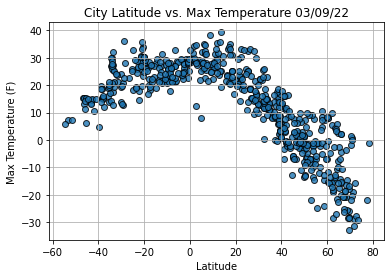

In [42]:
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


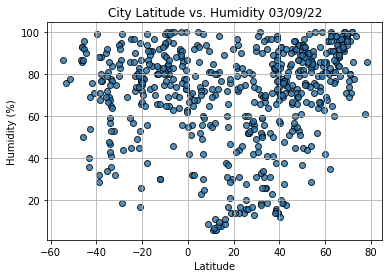

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

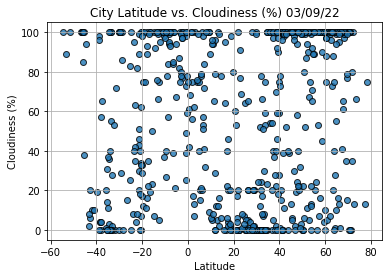

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

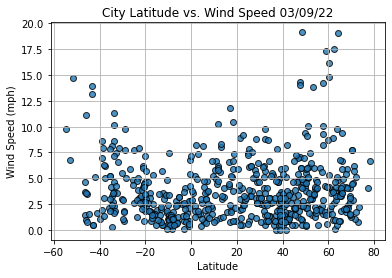

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create a function to perform linear regression

In [65]:
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] < 0)]

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cherskiy,RU,2022-03-09 09:00:50,68.7500,161.3000,-14.55,82,99,2.46
3,Torbay,CA,2022-03-09 09:00:51,47.6666,-52.7314,-1.35,73,94,14.31
8,Provideniya,RU,2022-03-09 09:00:54,64.3833,-173.3000,-10.69,77,1,4.83
10,Khor,RU,2022-03-09 09:00:54,47.8861,134.9464,-2.33,94,100,2.33
11,Kodiak,US,2022-03-09 09:00:55,57.7900,-152.4072,4.73,93,100,1.54


In [66]:
from scipy.stats import linregress

def plot_lin_regress(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values= x_values*slope + intercept
    
    lin_eq= "y = "+ str(round(slope,2))+"x" + str(round(intercept, 2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(lin_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

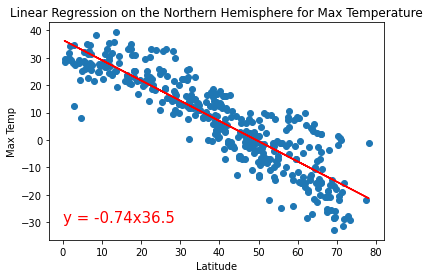

In [74]:
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Max Temp']

# Call the function.
plot_lin_regress(x_values, y_values, 
                 "Linear Regression on the Northern Hemisphere for Max Temperature",
                 "Max Temp", (0, -30))
    


In [70]:
southern_hemi_df['Lat']

0     -21.2078
2     -33.9258
4     -17.7125
5     -23.1203
6     -33.6500
        ...   
554   -22.4167
559    -0.0333
568   -29.6842
569   -17.0000
580    -9.6567
Name: Lat, Length: 189, dtype: float64

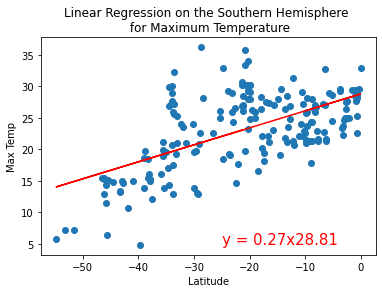

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_lin_regress(x_values, y_values,
                'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,5))


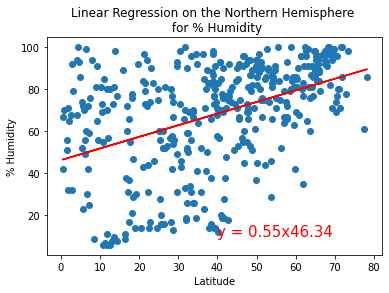

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_lin_regress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


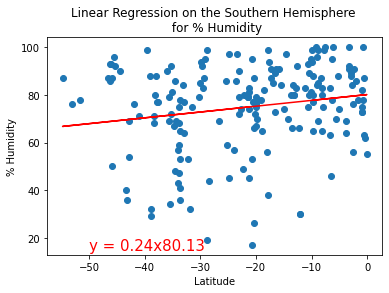

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_lin_regress(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


In [ ]:
# linear regression on % cloudiness for the Northern Hemisphere

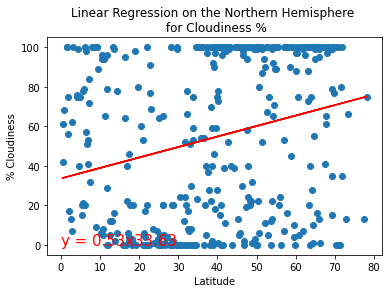

In [87]:
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Cloudiness']

plot_lin_regress(x_values, y_values,
                "Linear Regression on the Northern Hemisphere \n for Cloudiness %", "% Cloudiness", (0, 0) )

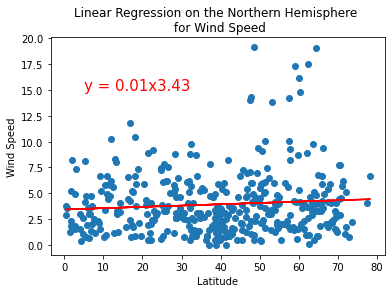

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_lin_regress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,15))
